In [51]:
import pandas as pd
regions = ['REGION DE VALPARAISO','REGION DEL MAULE','REGION DEL BIOBIO']#,'REGION METROPOLITANA DE SANTIAGO'
df = pd.read_excel('../data/BDH_HISTORICA ANID.xlsx', sheet_name='BDH_HISTORICA')
df = df.loc[df['AGNO_CONCURSO']>2020]
df = df.loc[df['REGION_EJECUCION'].isin(regions)]
df.head(3)

N CODIGO_PROYECTO                        SUBDIRECCION PROGRAMA  \
36750  36751      FOVI210008     REDES ESTRATEGIA Y CONOCIMIENTO     SREC   
36753  36754       ACT210025  CENTROS E INVESTIGACION ASOCIATIVA      PIA   
36757  36758      FOVI210035     REDES ESTRATEGIA Y CONOCIMIENTO     SREC   

                                    INSTRUMENTO  \
36750  FOMENTO VINCULACION INTERNACIONAL - FOVI   
36753                               ANILLOS CYT   
36757  FOMENTO VINCULACION INTERNACIONAL - FOVI   

                                         NOMBRE_CONCURSO  AGNO_CONCURSO  \
36750  CONCURSO DE FOMENTO A LA VINCULACION INTERNACI...           2021   
36753  CONCURSO ANILLOS REGULAR DE INVESTIGACION EN C...           2021   
36757  CONCURSO DE FOMENTO A LA VINCULACION INTERNACI...           2021   

       AGNO_FALLO                                    NOMBRE_PROYECTO  \
36750        2021  SPACEWAVE3D GRUPO DE INVESTIGACION EN IMPRESIO...   
36753        2021  CHILEAN FRUITS CELL WALL COMPONENTS AS BIOTECH...   
36757        2021  INVESTIGACION Y DIFUSION DE POLITICAS DE ACCOU...   

                     AREA_OCDE  ... TIPO_BENEFICIARIO NOMBRE_RESPONSABLE  \
36750  INGENIERIA Y TECNOLOGIA  ...  PERSONA JURIDICA  FRANCISCO PIZARRO   
36753       CIENCIAS AGRICOLAS  ...  PERSONA JURIDICA    MARIA MOYA LEON   
36757        CIENCIAS SOCIALES  ...  PERSONA JURIDICA        MARIA LEIVA   

         SEXO                          INSTITUCION_PRINCIPAL  \
36750  HOMBRE  PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO   
36753   MUJER                           UNIVERSIDAD DE TALCA   
36757   MUJER  PONTIFICIA UNIVERSIDAD CATOLICA DE VALPARAISO   

      MACROZONA_MINCIENCIA      REGION_EJECUCION MONTO_ADJUDICADO NOTA_MONTO  \
36750               CENTRO  REGION DE VALPARAISO            19920        NaN   
36753           CENTRO SUR      REGION DEL MAULE           450000        NaN   
36757               CENTRO  REGION DE VALPARAISO            18080        NaN   

                    MONEDA                                    PALABRAS_CLAVES  
36750  Miles de pesos (M$)  3D-PRINTED ANTENNAS  3D-PRINTING  SATELLITE CO...  
36753  Miles de pesos (M$)  AGROINDUSTRIAL WASTES  CELL WALL DEGRADING ENZ...  
36757  Miles de pesos (M$)  ACCOUNTABILITY  EDUCATIONAL MANAGEMENT  EDUCAT...  

[3 rows x 23 columns]

In [13]:
df.columns

Index(['N', 'CODIGO_PROYECTO', 'SUBDIRECCION', 'PROGRAMA', 'INSTRUMENTO',
       'NOMBRE_CONCURSO', 'AGNO_CONCURSO', 'AGNO_FALLO', 'NOMBRE_PROYECTO',
       'AREA_OCDE', 'DISCIPLINA_DETALLE', 'GRUPO_DE_EVALUACION',
       'DURACION_MESES', 'TIPO_BENEFICIARIO', 'NOMBRE_RESPONSABLE', 'SEXO',
       'INSTITUCION_PRINCIPAL', 'MACROZONA_MINCIENCIA', 'REGION_EJECUCION',
       'MONTO_ADJUDICADO', 'NOTA_MONTO', 'MONEDA', 'PALABRAS_CLAVES'],
      dtype='object')

In [28]:
import altair as alt
alt.data_transformers.disable_max_rows()
# Crear el gráfico de barras
chart = (
    alt.Chart(df)
       .mark_bar()
       .encode(
           x='sum(MONTO_ADJUDICADO):Q',  # O de ordinal
           y='PROGRAMA:N'       # Q de cuantitativo
       )
       .properties(
           title='Ejemplo de Gráfico de Barras con Altair'
       )
).facet('REGION_EJECUCION')

# Mostrar en Jupyter o exportar a HTML
chart.show()  # En notebooks de Jupyter

alt.FacetChart(...)

In [55]:
import altair as alt
alt.data_transformers.disable_max_rows()
# Crear el gráfico de barras
chart = (
    alt.Chart(df)
       .mark_bar()
       .encode(
           x='sum(MONTO_ADJUDICADO):Q',  # O de ordinal
           y='AREA_OCDE:N',
            color='AGNO_CONCURSO:N',     
       )
       .properties(
           title='Ejemplo de Gráfico de Barras con Altair'
       )
).facet('REGION_EJECUCION')

# Mostrar en Jupyter o exportar a HTML
chart.show()  # En notebooks de Jupyter

alt.FacetChart(...)

['INGENIERIA Y TECNOLOGIA' 'CIENCIAS AGRICOLAS' 'CIENCIAS SOCIALES'
 'CIENCIAS NATURALES' 'CIENCIAS MEDICAS Y DE LA SALUD' 'HUMANIDADES'
 'MULTIDISCIPLINARIO' 'SIN INFORMACION']


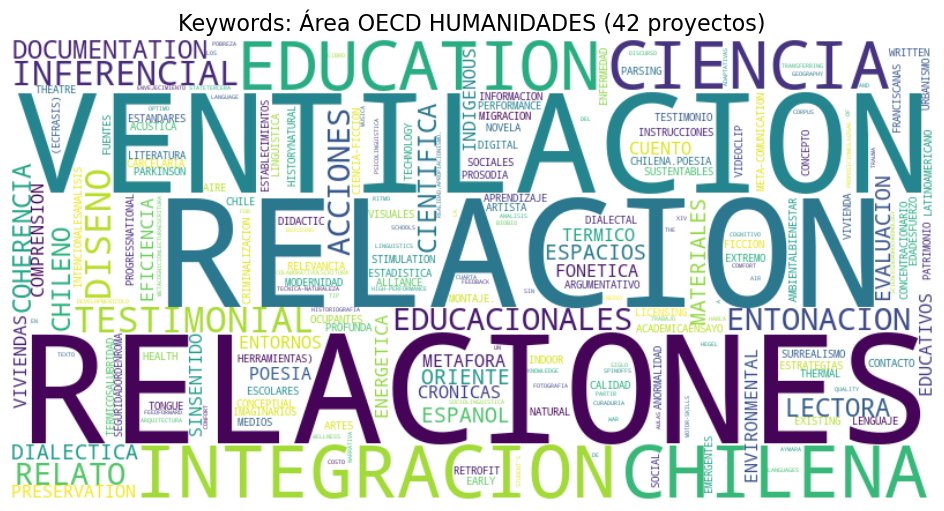

In [81]:
from difflib import SequenceMatcher
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sólo se debe cambiar este número entre 0-6 para seleccionar las áreas
choose = 5
areas_oecd = df['AREA_OCDE'].unique()
print(areas_oecd)
df2 = df.loc[df['REGION_EJECUCION']=='REGION DEL BIOBIO'].loc[df['AREA_OCDE']==areas_oecd[choose]]
df2 = df2.map(str)
num_projects = len(df2)

# 1) Define tu lista de palabras
words = [x.split(" ") for x in df2['PALABRAS_CLAVES'].tolist()]
words = [item for sublist in words for item in sublist]
words = [x for x in words if len(x)>0]


# 2) Construye la matriz de similitud
n = len(words)
sim_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            sim_matrix[i, j] = 1.0
        else:
            sim_matrix[i, j] = SequenceMatcher(None, words[i], words[j]).ratio()

# 3) Calcula el índice de similitud medio por palabra
mean_sim = sim_matrix.mean(axis=1)

# 9) Guardar palabras clave y su peso en un archivo de texto
with open('keywords_{0}.txt'.format(areas_oecd[choose]), 'w', encoding='utf-8') as f:
    f.write("palabra\tpeso\n")
    for palabra, peso in freq_dict.items():
        f.write(f"{palabra}\t{peso:.4f}\n")

# 4) Prepara un diccionario palabra→peso para la nube
freq_dict = { words[i]: float(mean_sim[i]) for i in range(n) }

# 5) Genera la nube de palabras
wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(freq_dict)

# 6) Muestra con matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Keywords: Área OECD {0} ({1} proyectos)'.format(areas_oecd[choose], num_projects), fontsize=16)
plt.show()

['INGENIERIA Y TECNOLOGIA' 'CIENCIAS AGRICOLAS' 'CIENCIAS SOCIALES'
 'CIENCIAS NATURALES' 'CIENCIAS MEDICAS Y DE LA SALUD' 'HUMANIDADES'
 'MULTIDISCIPLINARIO' 'SIN INFORMACION']


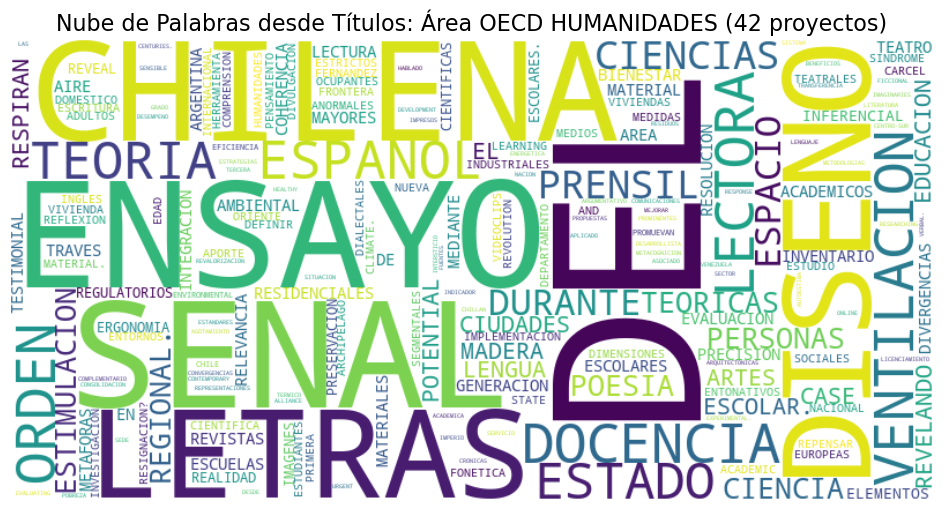

In [82]:
from difflib import SequenceMatcher
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
areas_oecd = df['AREA_OCDE'].unique()
print(areas_oecd)
df2 = df.loc[df['REGION_EJECUCION']=='REGION DEL BIOBIO'].loc[df['AREA_OCDE']==areas_oecd[choose]]
df2 = df2.map(str)

# 1) Define tu lista de palabras
words = [x.split(" ") for x in df2['NOMBRE_PROYECTO'].tolist()]
words = [item for sublist in words for item in sublist]
words = [x for x in words if len(x)>0]


# 2) Construye la matriz de similitud
n = len(words)
sim_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        if i == j:
            sim_matrix[i, j] = 1.0
        else:
            sim_matrix[i, j] = SequenceMatcher(None, words[i], words[j]).ratio()

# 3) Calcula el índice de similitud medio por palabra
mean_sim = sim_matrix.mean(axis=1)

# 9) Guardar palabras clave y su peso en un archivo de texto
with open('keywords_{0}.txt'.format(areas_oecd[choose]), 'w', encoding='utf-8') as f:
    f.write("palabra\tpeso\n")
    for palabra, peso in freq_dict.items():
        f.write(f"{palabra}\t{peso:.4f}\n")

# 4) Prepara un diccionario palabra→peso para la nube
freq_dict = { words[i]: float(mean_sim[i]) for i in range(n) }

# 5) Genera la nube de palabras
wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(freq_dict)

# 6) Muestra con matplotlib
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras desde Títulos: Área OECD {0} ({1} proyectos)'.format(areas_oecd[choose], num_projects), fontsize=16)
plt.show()